Part 1. Loading the data

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neural_network import MLPClassifier

In [76]:
train_data = pd.read_csv('Task2B_train.csv')    #loading the trainging data
test_data = pd.read_csv('Task2B_test.csv')  #loading the testing data

In [77]:
train_data

,feature1,feature2,label
0,1.517571,0.424917,1
1,0.304268,0.999691,0
2,0.485924,-0.222913,1
3,-0.933579,-0.093579,0
4,0.684210,-0.436912,1
...,...,...,...
1995,0.295214,0.108314,1
1996,0.356255,-0.425519,1
1997,-0.997532,0.737404,0
1998,0.772409,-0.894220,1


Plotting both the training and testing data in two different plots

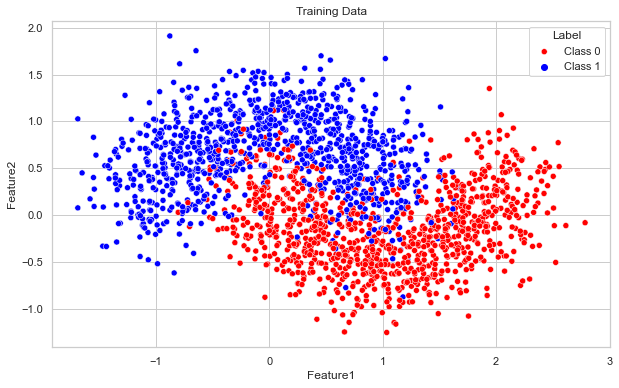

In [78]:
sns.set(style="whitegrid")   #plotting the training data using seaborn library
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data,x='feature1',y='feature2',hue='label',palette={0: 'blue', 1: 'red'})   #plotting a scatter plot
plt.title('Training Data') #adding title and other labels and legend
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Label', loc='upper right', labels=['Class 0','Class 1'])
plt.show()

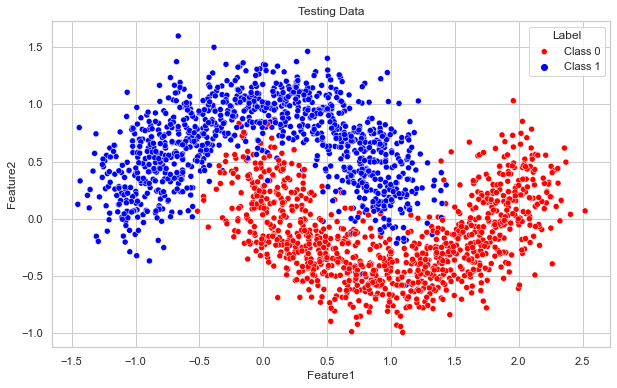

In [79]:
plt.figure(figsize=(10, 6))   #plotting the training data using seaborn library
sns.scatterplot(data=test_data,x='feature1',y='feature2',hue='label',palette={0: 'blue', 1: 'red'})  #plotting a scatter plot
plt.title('Testing Data') #adding title and other labels and legend
plt.xlabel('Feature1')  
plt.ylabel('Feature2')  
plt.legend(title='Label',loc='upper right',labels=['Class 0', 'Class 1'])
plt.show()

PART 2

In [80]:
train_data['label'] = 2 * train_data['label'] - 1   #changing the labels from [0, 1] to [-1,+1]
test_data['label'] = 2 * test_data['label'] - 1   #change the labels from [0, 1] to [-1,+1]

In [81]:
X_train, y_train = train_data[['feature1', 'feature2']].to_numpy(), train_data['label'].to_numpy()  
# Extracting the features and labels for training data
X_test, y_test = test_data[['feature1', 'feature2']].to_numpy(), test_data['label'].to_numpy()
# Extracting the features and labels for testing data
learning_rates = [0.1, 1.0]  #learning rates as given in the question
test_errors = []
for eta in learning_rates:
    perceptron = Perceptron(eta0=eta,max_iter=1000)   #intializing the Perceptron model
    perceptron.fit(X_train, y_train)   #fitting the perceptron model on the training data
    y_pred = perceptron.predict(X_test) # Predicting the labels on the testing data
    test_error = 1 - accuracy_score(y_test, y_pred)  # Calculating the test error
    test_errors.append(test_error)  #storing the test errors in a list
best_eta = learning_rates[np.argmin(test_errors)]  # Finding the best learning rate
best_model = Perceptron(eta0=best_eta, max_iter=1000)  #Finding the model with the best learning rate
best_model.fit(X_train, y_train)  #Fitting the model with the best learning rate

Perceptron(eta0=0.1)

In [82]:
' The best η is = {:.3f}'.format(best_eta)

' The best η is = 0.100'

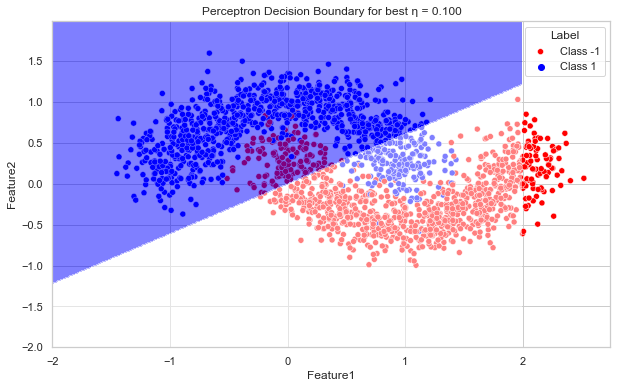

In [83]:
plt.figure(figsize=(10, 6)) #Difining the size of the plot for ploting the decision boundary and test data
sns.scatterplot(data=test_data, x='feature1', y='feature2', hue='label', palette={-1: 'blue', 1: 'red'}) #Creating the scatter plot
plt.title('Perceptron Decision Boundary for best η = {:.3f}'.format(best_eta))
plt.xlabel('Feature1')
plt.ylabel('Feature2')
xx, yy = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-2, 2, 0.01)) # Defining the decision boundary line
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])  #using the best model to make predictions
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'white', 'red'], alpha=0.5)  # Plotting the decision boundary
plt.legend(title='Label', loc='upper right', labels=['Class -1', 'Class 1']) #defining the legend
plt.show()

PART 3

In [120]:
K_values = range(5, 41, 5)
learning_rates = [0.01, 0.001]
test_errors_1 = []
test_errors_2 = []
acc_1 = []
acc_2 = []
best_accuracy = 0
best_K = 0
best_eta = 0
best_model = None
for K in K_values:
    for eta in learning_rates:
        neuraln = MLPClassifier(hidden_layer_sizes=(K,),learning_rate_init=eta, max_iter=1000)
        # Creating the 3-layered neural network
        neuraln.fit(X_train, y_train)  #Fitting the 3-layered neural network
        y_pred = neuraln.predict(X_test) # Predicting on the testing data
        accuracy = accuracy_score(y_test, y_pred)  # Calculating the accuracy error
        test_error = 1 - accuracy # Calculating the testing error  
        if eta == 0.01:
            test_errors_1.append(test_error) #Storing the test errors
            acc_1.append(accuracy)
        else:
            test_errors_2.append(test_error) #Storing the test errors
            acc_2.append(accuracy)
        if accuracy > best_accuracy:  #Finding the K, eta and model with the best accuracy
            best_accuracy = accuracy
            best_K = K
            best_eta = eta
            best_model = neuraln

In [128]:
'The best accuracy = {:.4f}. The best K = {:.1f}. The best eta = {:.3f}'.format(best_accuracy,best_K,best_eta)

'The best accuracy = 0.9685. The best K = 35.0. The best eta = 0.010'

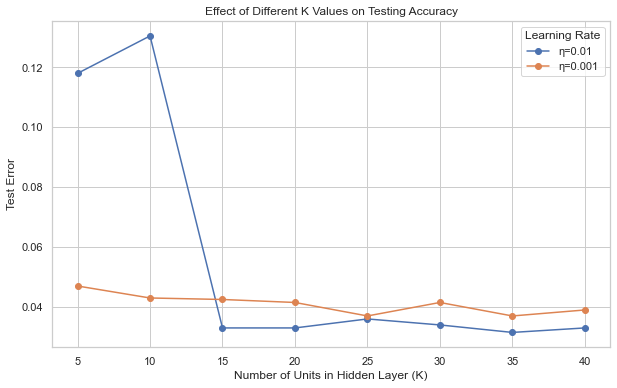

In [123]:
plt.figure(figsize=(10, 6))  # Creating the plot for plotting the effects of different K values on the testing error
plt.plot(K_values, test_errors_1, marker='o', label='η=0.01') #Plotting for η=0.01
plt.plot(K_values, test_errors_2, marker='o', label='η=0.001')  #Plotting for η=0.001
plt.title('Effect of Different K Values on Testing Accuracy')
plt.xlabel('Number of Units in Hidden Layer (K)')
plt.ylabel('Test Error')
plt.xticks(K_values)
plt.legend(title='Learning Rate', loc='upper right')
plt.grid(True)
plt.show()

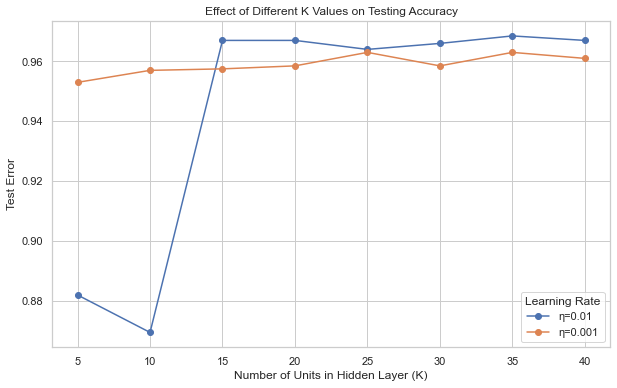

In [124]:
plt.figure(figsize=(10, 6))  # Creating the plot for plotting the effects of different K values on the testing accuracy
plt.plot(K_values, acc_1, marker='o', label='η=0.01') #Plotting for η=0.01
plt.plot(K_values, acc_2, marker='o', label='η=0.001')  #Plotting for η=0.001
plt.title('Effect of Different K Values on Testing Accuracy')
plt.xlabel('Number of Units in Hidden Layer (K)')
plt.ylabel('Test Error')
plt.xticks(K_values)
plt.legend(title='Learning Rate', loc='lower right')
plt.grid(True)
plt.show()

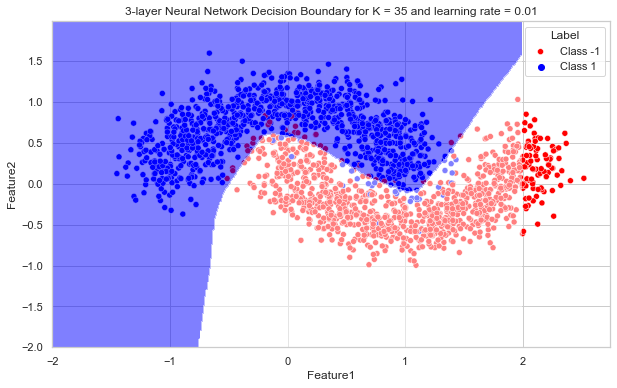

In [127]:
best_neuraln = best_model #using the best model
best_neuraln.fit(X_train, y_train) #fitting the best model
plt.figure(figsize=(10, 6)) #Plotting the decision boundary and testing data
sns.scatterplot(data=test_data, x='feature1', y='feature2', hue='label', palette={-1: 'blue', 1: 'red'}) #Creating the scatter plot
plt.title('3-layer Neural Network Decision Boundary for K = {} and learning rate = {}'.format(best_K, best_eta))
plt.xlabel('Feature1')
plt.ylabel('Feature2')
xx, yy = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-2, 2, 0.01)) #Defining the decision boundary line
Z = best_neuraln.predict(np.c_[xx.ravel(), yy.ravel()]) #making the predictions using the best model 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'white', 'red'], alpha=0.5) #plotting the decision boundary
plt.legend(title='Label', loc='upper right', labels=['Class -1', 'Class 1']) #defining the legend
plt.show()

PART 4

The difference between the perceptron and the 3-layer Neural Network can be explained by examining the plots and considering the model assumptions and characteristics of each approach. 
1. Perceptron model: It can only create linear decision boundaries. This means it can separate data into two classes using straight lines only and so cannot create complex and nonlinear boundaries. This is because Perceptron's mathematical model is based on a linear combination of features and it makes predictions based on whether this combination is above or below a threshold. We can see this in the plot as the decision boundary is a straight line. 
2. 3-layer Neural Network model: It can create complex and nonlinear boundaries. This is because it uses multiple layers which also includes one or more hidden layers and then uses nonlinear activation functions like reLU between them. These nonlinear activation functions allow the network to model and capture intricate relationships within the data. So the decision boundary in the Neural Network plot is not a simple straight line and takes on more complex shapes as we can see in the plot and so captures nonlinear patterns in the data.

So as the Perceptron is a linear model while the 3-layer Neural Network is a nonlinear model it has the ability to capture complex patterns. This is why the Perceptron's decision boundary is a straight line and the Neural Network's decision boundary takes on a more presise shape.